# Some python techniques useful for your assignment

IHE Transient groundwater
@Theo Olsthoorn
2019-01-17
2019-12-21

## Introduction

To help you get up and going with your assignment, I explain in this notebook some features of Python and some techniques in Python that will prove useful.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import exp1

## Strings (unchangable series of characters)

In [2]:
a = 'This is a string'
print(a)

This is a string


The function `dir(a)` gives all objects associated with `a`, a string. Show only the public ones, i.e. the ones that do not start with '_'.

Here are the functions that can be applied on strings. But there is none with which you can change an existing string; you can, however, replace your string it with a new one.

In [3]:
# I use a list comprehension to generate a list from an iterable (see further down
# for explanation)
methods = [x for x in dir(a) if not x.startswith('_')]
print(methods)

['capitalize', 'casefold', 'center', 'count', 'encode', 'endswith', 'expandtabs', 'find', 'format', 'format_map', 'index', 'isalnum', 'isalpha', 'isascii', 'isdecimal', 'isdigit', 'isidentifier', 'islower', 'isnumeric', 'isprintable', 'isspace', 'istitle', 'isupper', 'join', 'ljust', 'lower', 'lstrip', 'maketrans', 'partition', 'removeprefix', 'removesuffix', 'replace', 'rfind', 'rindex', 'rjust', 'rpartition', 'rsplit', 'rstrip', 'split', 'splitlines', 'startswith', 'strip', 'swapcase', 'title', 'translate', 'upper', 'zfill']


Now apply some of these so-called string methods on the string `a`.

In [4]:
print(a.title(), ", result is a with capitalized first letter.")
# Note you get a new string, a is still the same
print(a, ", a is still unchanged.")

This Is A String , result is a with capitalized first letter.
This is a string , a is still unchanged.


In [5]:
a.upper()

'THIS IS A STRING'

In [6]:
a.split() # split the string on whitespace

['This', 'is', 'a', 'string']

In [7]:
a.startswith('John')

False

In [8]:
a.endswith('ing')

True

In [9]:
a.upper().endswith('ING')

True

Insert values into a string on successive locations indicated by {}. This is done by applying the function `format` on the string. The aguments of `format(..)` are the values that will be formatted and placed in the successive placeholders `{}`.

We can put code inside these placeholders to specify how each value should be formatted. Read the documentation to find out. There is a wealth of possibilities.

In [10]:
'Today is {} {} {} in the year {}.'.format('Monday', 3, 'Feb', 2019)

'Today is Monday 3 Feb in the year 2019.'

## Tuples (unchangeble lists)

In [11]:
# a tuple is a list with parentheses ()
a = (1, 2, 'a', 'string', np.array([9, 3, 4]))
print(a)

(1, 2, 'a', 'string', array([9, 3, 4]))


In [12]:
# Items can be accessed by referring to them using a numerix index
print(a[0], ', first')
print(a[1], ', second')
print(a[-1], ', last')
print(a[-2], ', last but one')

1 , first
2 , second
[9 3 4] , last
string , last but one


Selection of more than one item at once to get a sub-tuple, is done by by
slicing like so: a[:] = 'all' of tuple `a`, `a[:5]` means `a` from start up to but not including item 5, `a[4:]` means `a` from item 4 to the last item.

Examples

In [13]:
print(a[2:], ', third to last')
print(a[:-3], ', frist up to last but 3')
print(a[0], ', first item')
print(a[-1], ', last item')
print(a[-3:], ', last 3 items')

('a', 'string', array([9, 3, 4])) , third to last
(1, 2) , frist up to last but 3
1 , first item
[9 3 4] , last item
('a', 'string', array([9, 3, 4])) , last 3 items


By slicing (with the colon :) you always get a tuple back, unless the result is only a single item, then you get the item itself  a[0:1] would yield the first item (0 up to but not including 1)])

A tuple consisting of only one item is indicated with a comma:

In [14]:
b = (2,)
c = (2)
print(b, ' b is a tuple, due to the comma')
print(c, ' c is just aa number, not a tuple')

(2,)  b is a tuple, due to the comma
2  c is just aa number, not a tuple


A series of items separated by comma's is also a tuple, like in the arguments of a function.

In [15]:
1, 2, 3, 4

(1, 2, 3, 4)

A single number or any single object ended with a comma indicates a tuple of one item

In [16]:
a = 3,
b = 'sheep',
c = 'sheep'  # no comma here
print(a, type(a))
print(b, type(b))
print(c, type(c))

(3,) <class 'tuple'>
('sheep',) <class 'tuple'>
sheep <class 'str'>


## Lists are just like tuples, but can be changed in place

Lists are demarcated by straight brackets `[ ]` instead of parentheses `( )`. But they work further exactly like tuples:

In [17]:
a = [1, 2, 'a', 'string', np.array([9, 3, 4])]  # a list, not a tuple, because it has [..]
print(a)

[1, 2, 'a', 'string', array([9, 3, 4])]


Don't use a comma to indicate a list a list of only one item.

`[3]` means a list of one item (item = 3)
`[3,]` means turn the tuple `(3,)` into a list.
It is namely the same as `[(3,)]` because `3,` is same as `(3,)` as was explained above.

In [18]:
b = [3,]  # turn tuple (3,) into a list
c = [3]   # put item 3 into a list
print(b)
print(c)

[3]
[3]


A list is changable in place. So you can insert items and extend it or sort it, all in place, which you cannot with a tuple, which you have to replace.

In [19]:
a = ['The', 'quick', 'fox']
a.append([['cow', 'chick'], 'bull', 'John', np.array([4, 3, 2])])
print(a)  

['The', 'quick', 'fox', [['cow', 'chick'], 'bull', 'John', array([4, 3, 2])]]


Note we have appended an entire list to the list `a` and we did so in-place, meaning that `a` itself has now changed. 

Notice that a now consists of 4 items. First three strings and then an entire list as the fourth item, which itself also contains items and even a list. But `a` has only four items after the `append()`.

This is what you can do with a list (dir(a) gives the methods associated with list a, so that the can be applied on `a` with the dot `.`, like `a.count()`, `a.append(..)` etc.):

In [20]:
c = [x for x in dir(a) if not x.startswith('_')]
print(c)

['append', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort']


Here is what you can do with a tuple

In [21]:
b = tuple(a) # assign to b the tuple version of a (but that does not change a)
print(a)
print(b)

# Methods associated with a tuple of which `c` is an instantiation
print()
print('Methods associated with tuples:')
c = [x for x in dir(b) if not x.startswith('_')]
print(c)

['The', 'quick', 'fox', [['cow', 'chick'], 'bull', 'John', array([4, 3, 2])]]
('The', 'quick', 'fox', [['cow', 'chick'], 'bull', 'John', array([4, 3, 2])])

Methods associated with tuples:
['count', 'index']


Only count and index, no append insert or pop or sort, i.e. anything that could alter the tuple.

Hence, trying to append something tuple `b` won't work. But we can replace `b`.

In [22]:
#('one', 'two').append('cow') # this gives an error, because a tuple has no attribute 'append'
['one', 'two'].append('three') # works

However, because append changes the list in place, it does not produce output so we have no result unless we assign the list to a variable.

In [23]:
a = ['one', 'two']
b = a.append('cow')
print(b, ', This is "b", it is a "None" because a.append()',
              'changes "a" in place and yields no output.')
print(a, ', This is "a", it was changed in place.')

None , This is "b", it is a "None" because a.append() changes "a" in place and yields no output.
['one', 'two', 'cow'] , This is "a", it was changed in place.


## Numpy arrays, so-called ndarrays (n-dimensional arrays)

Arrays may look like lists, but they are not. In a lists each item can be of a different type, as was shown above, but in an array all items must be of the same type like floating point numbers. An array forms one contiguous block in memory, in which each item occupies the same number of bytes (a floating point number occupies 8 bytes, an integer 4 bytes). This means that items can be accessed at full speed using indexing and slicing. You can also add arrays of the same size together, take the power on a whole array or other functions etc. You cannot do this with a list, because items in the list may be of completely different types. In fact, the items in the list are stored on different locations in memory, while the list is just a number of pointers that indicate these places in memory so that they can be accessed indirectly, yet still quite fast.

If you multiply a list, you copy the list and append it like so:

In [24]:
a = [3, 2, 5, 'a', 'horse']
print('5 times list a =', 5 * a)
print()
print('a + a + a = ', a + a + a)

5 times list a = [3, 2, 5, 'a', 'horse', 3, 2, 5, 'a', 'horse', 3, 2, 5, 'a', 'horse', 3, 2, 5, 'a', 'horse', 3, 2, 5, 'a', 'horse']

a + a + a =  [3, 2, 5, 'a', 'horse', 3, 2, 5, 'a', 'horse', 3, 2, 5, 'a', 'horse']


But if you multiply an array, then each item in the array is multiplied as expected.

First generate an array (a numpy ndarray):

In [25]:
b = np.array([3, 4, 5, 2, 9, 8])

`b` is not a list, but an array, because `np.array(..)` function turns the given list into an array.

In [26]:
print(type(a))
print(type(b))

<class 'list'>
<class 'numpy.ndarray'>


In [27]:
print('5 times b =', 5 * b)

5 times b = [15 20 25 10 45 40]


In [28]:
print('b + b + b =', b + b + b)

b + b + b = [ 9 12 15  6 27 24]


In [29]:
print('b * 2 * b**3 = ', b * 2 * b ** 3)

b * 2 * b**3 =  [  162   512  1250    32 13122  8192]


In [30]:
print(np.sqrt(b))

[1.73205081 2.         2.23606798 1.41421356 3.         2.82842712]


In [31]:
print(np.sin(b * np.exp(-5)))

[0.02021246 0.02694853 0.03368336 0.01347549 0.06060436 0.05387748]


## Some ways to generate arrays

In [32]:
# Tell numpy to convert a list or a tuple into an array
a = np.array([3, 2, 4, 5])
print(a)

[3 2 4 5]


In [33]:
a = np.arange(3, 7, 0.3) # start at 3 upto (not including 7, with steps of 0.3)
print(a)

[3.  3.3 3.6 3.9 4.2 4.5 4.8 5.1 5.4 5.7 6.  6.3 6.6 6.9]


In [34]:
a = np.linspace(1, 4, 11) # give 11 points starting at 1 and ending at 4
print(a)

[1.  1.3 1.6 1.9 2.2 2.5 2.8 3.1 3.4 3.7 4. ]


In [35]:
a = np.logspace(-2, 1, 31) # 10**(-2) to 10**1 in 30 steps (31 values)
print(a)

[ 0.01        0.01258925  0.01584893  0.01995262  0.02511886  0.03162278
  0.03981072  0.05011872  0.06309573  0.07943282  0.1         0.12589254
  0.15848932  0.19952623  0.25118864  0.31622777  0.39810717  0.50118723
  0.63095734  0.79432823  1.          1.25892541  1.58489319  1.99526231
  2.51188643  3.16227766  3.98107171  5.01187234  6.30957344  7.94328235
 10.        ]


In [36]:
a = np.zeros_like(a)
print(a)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]


In [37]:
a = 5 * np.ones((3, 2)) # 2D array with 3 rows and 2 columns
print(a)

[[5. 5.]
 [5. 5.]
 [5. 5.]]


In [38]:
a[:, 1] = np.pi # replace all rows of column 2 (with index 1) by np.pi
print(a)

[[5.         3.14159265]
 [5.         3.14159265]
 [5.         3.14159265]]


In [39]:
b = np.sin(2 * np.pi * a) # apply function on all values in array
print(b)

[[-1.2246468e-15  7.7685322e-01]
 [-1.2246468e-15  7.7685322e-01]
 [-1.2246468e-15  7.7685322e-01]]


## For-loops with zipping and enumerate

A for loop cycles over an iterable, which is something you can iterate over like a `list`, a `tuple`, an `array`, a `string`. Here are some examples.

In [40]:
a = [1, 3, 5, 4, 6, 2, 2]  # a list, this is a so-called iterable
b = np.array(a)   # turn list a into an array, an array is also an iterable
c = ['a', 'bear', 'c', 'd', 'echo', 'f', 'gulf'] # list of strings
for x in a:
    print(x, end=' ')

1 3 5 4 6 2 2 

In each new cycle of the loop, the next item of the iterble is taken and can be used inside the loop. But very often we have a set of iterable like the array of x-coordinates of the wells, the array of y-coordinates of the wells and the list of extractions from the wells. In each cycle of the loop we need the next `x`, the next `y` and the next `Q` at the same time. To deal with such a set of iterables in a loop just put them in a `zip(..)` function.

In [41]:
for aa, bb, cc in zip(a, b, c): # a, b, c are iterables, aa, bb and cc are items
    print([aa, bb, cc])

[1, 1, 'a']
[3, 3, 'bear']
[5, 5, 'c']
[4, 4, 'd']
[6, 6, 'echo']
[2, 2, 'f']
[2, 2, 'gulf']


Oftentimes you not only want the next times from the iterable but also have a counter, an index while looping. This counter can be obtained by packing the `iterable` or the entire `zip(..)` with all its iterables in an `enumerate(..)` function. Note that counting starts with 0 in python, not 1.

In [42]:
for i, (aa, bb, cc) in enumerate(zip(a, b, c)):
    print([i, aa, bb, cc])

[0, 1, 1, 'a']
[1, 3, 3, 'bear']
[2, 5, 5, 'c']
[3, 4, 4, 'd']
[4, 6, 6, 'echo']
[5, 2, 2, 'f']
[6, 2, 2, 'gulf']


This type of  looping is efficient and extremely useful in practice. For instance we have 5 wells so 5 x vales, 5 y values 5 flows for which we want the `drawdown s` at a given point `x0`, `y0`

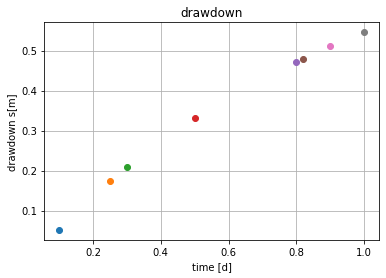

In [43]:
kD = 600 # m2/d
S  = 0.1
t = 1.3 # d
xWells = [34, 123, 45. -70, -80.]
yWells = [-23., 45., -50., -30., 20.]
Qwells = [1200, 600., 350., 1200., 300]

x0, y0 = 0.3, 6.7  # multiple assignment, handy

times = [0.1, 0.25, 0.3, 0.5, 0.8, 0.82, 0.9, 1.0] # days

# plot individual times as a dot
plt.title('drawdown')
plt.xlabel('time [d]')
plt.ylabel('drawdown s[m]')
plt.grid()

for t in times:
    s = 0
    for xw, yw, Qw in zip(xWells, yWells, Qwells):
        r = np.sqrt((x0 - xw)**2 + (y0 - yw)**2)
        s += Qw / (4 * np.pi * kD) * exp1(r**2 * S / (4 * kD * t))
    plt.plot(t, s, 'o') # plot the point as a dot, color is automatic
    
plt.show()



## Superposition, using logical indexing to handle switch times

When dealing with superposition, we have a set of so called `switch times` at which the `boundary conditions` change and we have an `array of times` with values at small intervals to obtain sufficient values to produce a nice, detailed graph.

During the superposition loop, we need to obtain the results of for instance the head change `s` at times larger than the the switch time, e.g. `st3` when the well was swithed on. We compute its results for times `t - st3`, but only for those times for which `t > st3`.

We can select those times by logical indexing. That is, if `t` is an array of times and `ts3` is a single time, then `t > ts3` is an array of booleans, an array of True/False values of the same size as the array `t`, such that the elements that are True correspond with the condition `t > ts3`. We can then address the correct values of an array `s`, which has the same size as the array `t`. We do this like so `s[t > ts3]`. Or, in two steps: `I = t > ts3` and then select the right values like so `s[I]`.

In [44]:
times = np.linspace(0, 360, 361) # from 0 to 360, 361 points (1 d interval)
swt = [0, 30, 34, 60, 90, 96, 110, 150, 200, 220, 300, 305, 330]
Q   = np.array([300, 0, 200, 50, -30, 120, 50, 60, 150, 35, -50, 100, 0])

# changes of flow. hstack((a, b)) glues two arrays or a value and array together
dQ = np.hstack((Q[0], np.diff(Q)))
#print('dQ = ', dQ)

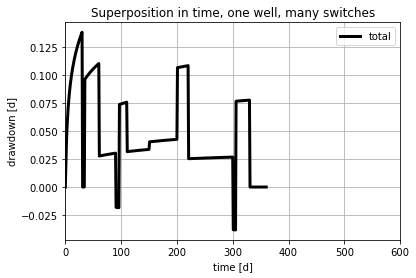

In [45]:
xw, yw, x0, y0 = 100, 50, 0.5, -3 # assigning all at once, well and obs point coordinates
r = np.sqrt((xw - x0)**2 + (yw - y0)**2)

# set up the plot
plt.title('Superposition in time, one well, many switches')
plt.xlabel('time [d]')
plt.ylabel('drawdown [d]')
plt.xlim((0, 600))
plt.grid()

# Initialize the head changes to an array of all zeroes
s = np.zeros_like(times)

# Do the superposition
for st, Q in zip(swt, dQ):
    I = times > st  # logical array I telling which times > st
    # print(I) # shows the booleans
    
    # effect of this well only, note times[I] are used onlyu
    ds = Q/(4 * np.pi * kD) * exp1(r**2 * S /(4 * kD * times[I] - st))
    #plt.plot(times[I], ds, label='st = {:.0f} d'.format(st))
    
    s[I] += ds # add them to s pertaining to the right times[I] !!
plt.plot(times, s, 'k', lw=3, label='total')
plt.legend()
plt.show()
    

It's extremely useful to get used to logical indexing of arrays. A logical index is an array of booleans (i.e. True/False values) of the same shape as the target arrays that can be used as indices. Like so

## Some elegant logical indexing, which is extremely useful

In [46]:
a = np.array([-3, 2, -1, 1.2, 3.2, 0.7, 3.2, -3, 5.1])
I = a > 0.15 # this yields a boolean array I
print(I)

[False  True False  True  True  True  True False  True]


Then use the boolean array to pick values

In [47]:
b = a[I]
print(b)
print(a[a > 0.15]) # read "a where a > 0.15"

[2.  1.2 3.2 0.7 3.2 5.1]
[2.  1.2 3.2 0.7 3.2 5.1]


We applied logical indexing above to select the times that were greater than ts, and did something with those times only.

Note that while the boolean array is as along as the target array. So boolean array `I` is as long as floating point array `a`, `a[I]` is smaller, i.e. it's as long as the number of True values in `I`

In [48]:
print('a.shape = ', a.shape) # yields a tuple with the array dimensions here, just 9
print('I.shape =', I.shape)
print('Number of True values in I:', np.sum(I)) # True becomes 1 in computations
print('Number of values in array a[I]: ', a[I].shape) # shape yields a tuple
print('Number of values in array a[I]: ', len(a[I]))  # len yiels an integer

a.shape =  (9,)
I.shape = (9,)
Number of True values in I: 6
Number of values in array a[I]:  (6,)
Number of values in array a[I]:  6


Here's an example of elegant usage of logical indexing to select subareas.

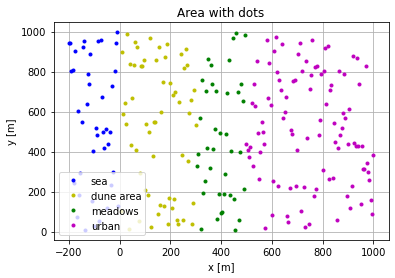

In [49]:
x = np.linspace(-200, 1000, 241) #; print(x)
y = np.random.rand(len(x)) * 1000 # randon number as many as there are x-values

# logical indexing, specifying subarea, names are intuitive
sea = x < 0
dunes = np.logical_and(x > 0, x <=300)
grass = np.logical_and(x > 300, x < 500)
urban = x >= 500

plt.title('Area with dots')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.grid()

plt.plot(x[sea], y[sea], 'b.', label='sea')           # b. means blue as dots
plt.plot(x[dunes], y[dunes], 'y.', label='dune area') # y. means yellow as dots
plt.plot(x[grass], y[grass], 'g.', label = 'meadows') # g. means green as dots
plt.plot(x[urban], y[urban], 'm.' , label= 'urban')   # m. means magenta as dots

plt.legend()
plt.show()

## List comprehensions to generate and filter lists

Start with an `iterable`, here an array, but it could by any `iterable` like a `tuple` or an `list`. An iterable is any object that can be iterated over (list, tuple, array, dictionary, even a tring)

In [50]:
a = np.array([-3, 2, -1, 1.2, 3.2, 0.7, 3.2, -3, 5.1])

By way of trivial start, generate a `list` from the `items` in this `iterable`

In [51]:
b = [y for y in a] # the most basic list comprehension, b will be the same as a
print('b = ', b)

b =  [-3.0, 2.0, -1.0, 1.2, 3.2, 0.7, 3.2, -3.0, 5.1]


Notice that `b` is not an array, it is now a `list`. Use `np.array(b)` to make it an `array` if you need it.

Next, select only the items from the array `a` that are larger than some value. This is called `filtering` the `iterable`:

In [52]:
b = [x for x in a if x > 1.1] # same but filtering out some values according to condition
print('b = ', b)

b =  [2.0, 1.2, 3.2, 3.2, 5.1]


And of course, you now got a list which is a bit shorter.

While get the items one by one in the comprehension, you may be tempted to do something with them before putting them in the new list. Here we take the logarithm of each item and we only take the items that fulfill the if-criterion of the comprehension.

In [53]:
c = [np.log(x**2) for x in a if x > 0]
print(c)

[1.3862943611198906, 0.36464311358790924, 2.3263016196113617, -0.7133498878774649, 2.3263016196113617, 3.25848107946056]


From this example it becomes clear that comprehensions can be really advanced and are very flexible.

As another example, we take only the items of type `str` and then convert these strings into their uppercase variants before putting them in the list:

In [54]:
a = ['aha', 1, np.array([3, 4.2]), 'John'] # list with objects of different type
[x.upper() for x in a if isinstance(x, str)] # get the strings from the list of items in uppercase

['AHA', 'JOHN']

Clearly, comprehensions are extremely flexible for generating new lists from iterables (an iterable can be a list, tuple, array, string, i.e. is somethign you can iterate over like in `for this in that`. Then `that` is the iterable and `this` is an item from the iterable.

You can always turn the obtained list into an array if it contains only numbers:

In [55]:
a = np.random.rand(10) # get 10 random numbers from the uniform distribuion
print(a)

[0.34002931 0.60527907 0.19226882 0.34173995 0.05403698 0.90028315
 0.78349603 0.86749492 0.54073142 0.90522101]


In [56]:
b = [y for y in a if y > 0.2]  # filter the values > 0.2 from the list into a new list
print('b = ', b) # list
print()
c = np.array([y for y in a if y > 0.2]) # turn the list inte an array
print('c = ', c) # an array
print()

# generate a list of strings. Using the floating point values obtained from the 
d = ['y = {:.2f}'.format(y) for y in a if y < 0.5] # an array of strings
print('d = ', d)

# If you have a list of strings, you can join them into a single string
print('joined into a single string: ', ';  '.join(d)) # this is now a string

b =  [0.340029308382628, 0.6052790719936957, 0.3417399455487897, 0.9002831456929633, 0.783496028777145, 0.8674949162157715, 0.5407314164689259, 0.9052210060737772]

c =  [0.34002931 0.60527907 0.34173995 0.90028315 0.78349603 0.86749492
 0.54073142 0.90522101]

d =  ['y = 0.34', 'y = 0.19', 'y = 0.34', 'y = 0.05']
joined into a single string:  y = 0.34;  y = 0.19;  y = 0.34;  y = 0.05


## Conclusions

* We showed strings, tuples, lists and numerical arrays (numpy ndarrays), which are all iterables (meaning: they can be iterated over).
* We showed some basic logical indexing.
* And used them in loops.
* We looped using several iterables in parallel to get values of them that belong together like  the x, y and Q of successive wells.
* We have only used one-dimensional arrays here. That is, we only scratched the surface of the possibilities multi-dimensional arrays. 
* We did not use list of lists or list of tuples or tuples of lists either to keep things simple. 
* We only used basic examples of list-comprehensions. List comprehensions are extremely powerful to generate lists on the fly.
* We did not look at dicts and dict comprehensions (generating dictionaries, just as powerful as list comprehensions).
* We only showed the simplist of logical indexing, which is a extremely powerful way of indexing in arrays.
* There is still a world of plotting possibilities to be explored (see matplotlib gallery for examples ready to use).
* But it's a good start.

You mway want to google for "Exploratory computing with Python by Mark Bakker" to get more excercises focused on engineering students like you.
 